# Проект по моделям машинного обучения с учителем (supervised learning) - Регрессия

## Описание данных

Используются данные буровой компании для предсказания плотности камня по отраженному сигналу на различных частотах. Это помогает в оптимизации замены буровых головок.

## Цель проекта

Определить наиболее эффективную модель регрессии для предсказания изменения плотности камня.

## Сравнительный анализ методов регрессии

Для выполнения задачи регрессии были использованы следующие модели:

1.  Линейная регрессия
2.  Полиномиальная регрессия
3.  Пайплайн для степеней полинома
4.  Регрессия KNN
5.  Деревья решений для регрессии
6.  Метод опорных векторов для регрессии
7.  Случайные леса для регрессии
8.  Градиентный бустинг
9.  Adaboost

Мы сравниваем производительность каждой модели, оценивая их точность и ошибки на тестовых данных.

## Заключение

В проекте были изучены возможности алгоритма случайных лесов для классификации и регрессии. Сравнительный анализ различных методов регрессии позволил выявить их сильные и слабые стороны в контексте специфической задачи.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

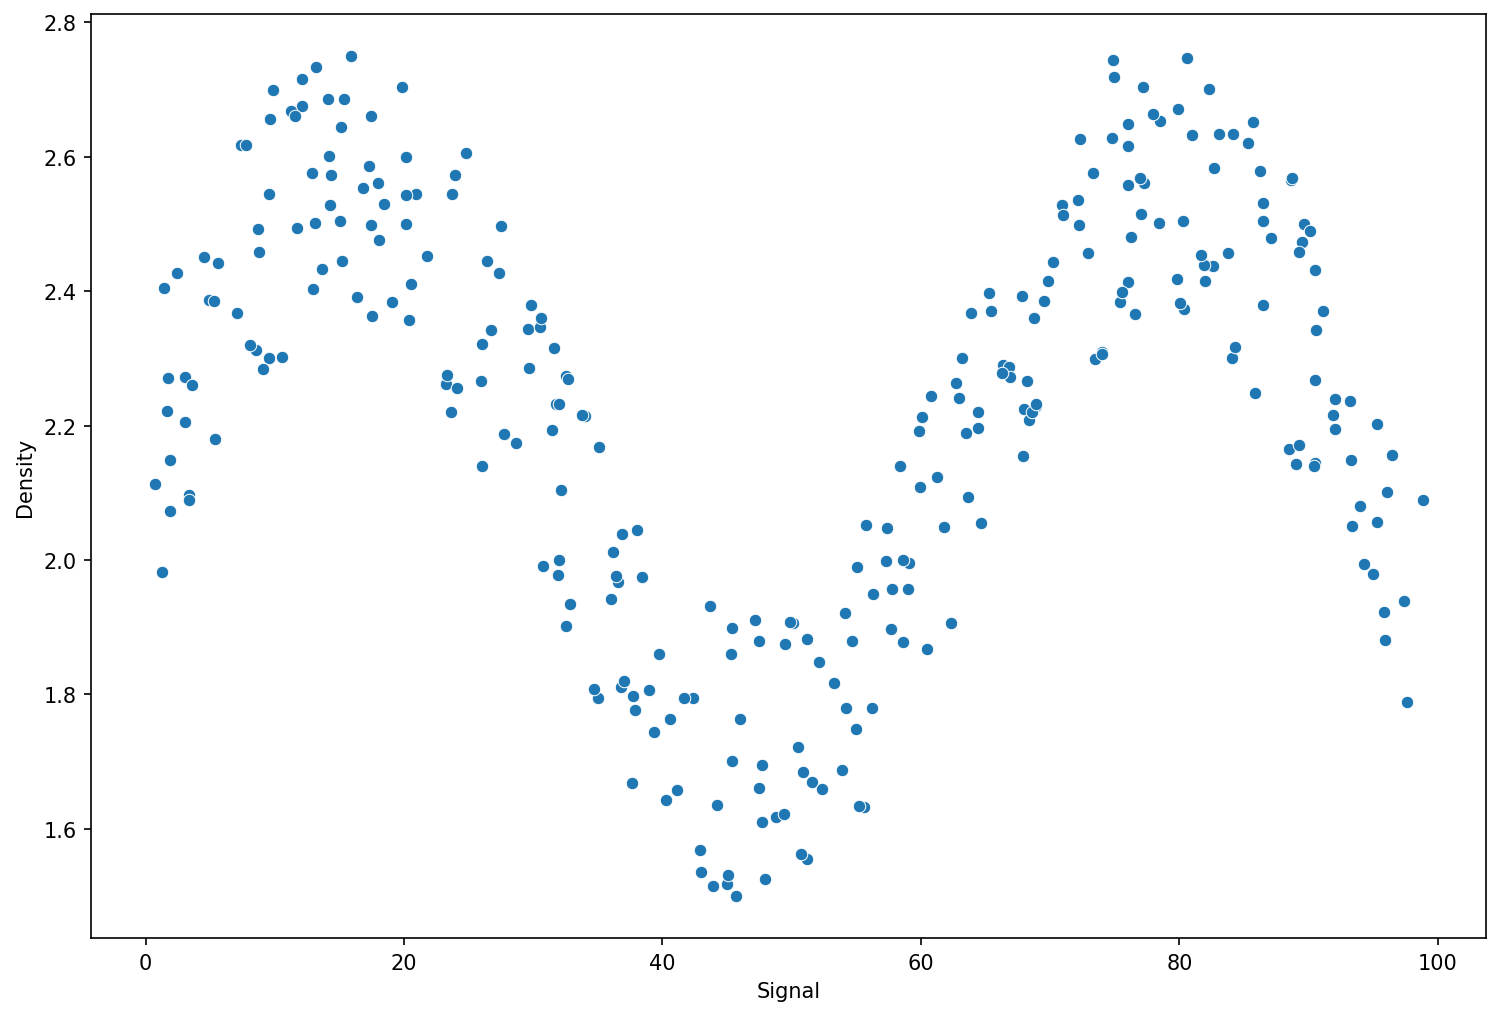

In [5]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Разбиение данных на обучающий и тестовый наборы 

Разбиение нужно для последующей оценки модели на тестовом наборе данных.

In [6]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

## Линейная регрессия

In [9]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f'RMSE : {rmse}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [10]:
lr_model = LinearRegression()

RMSE : 0.2570051996584629


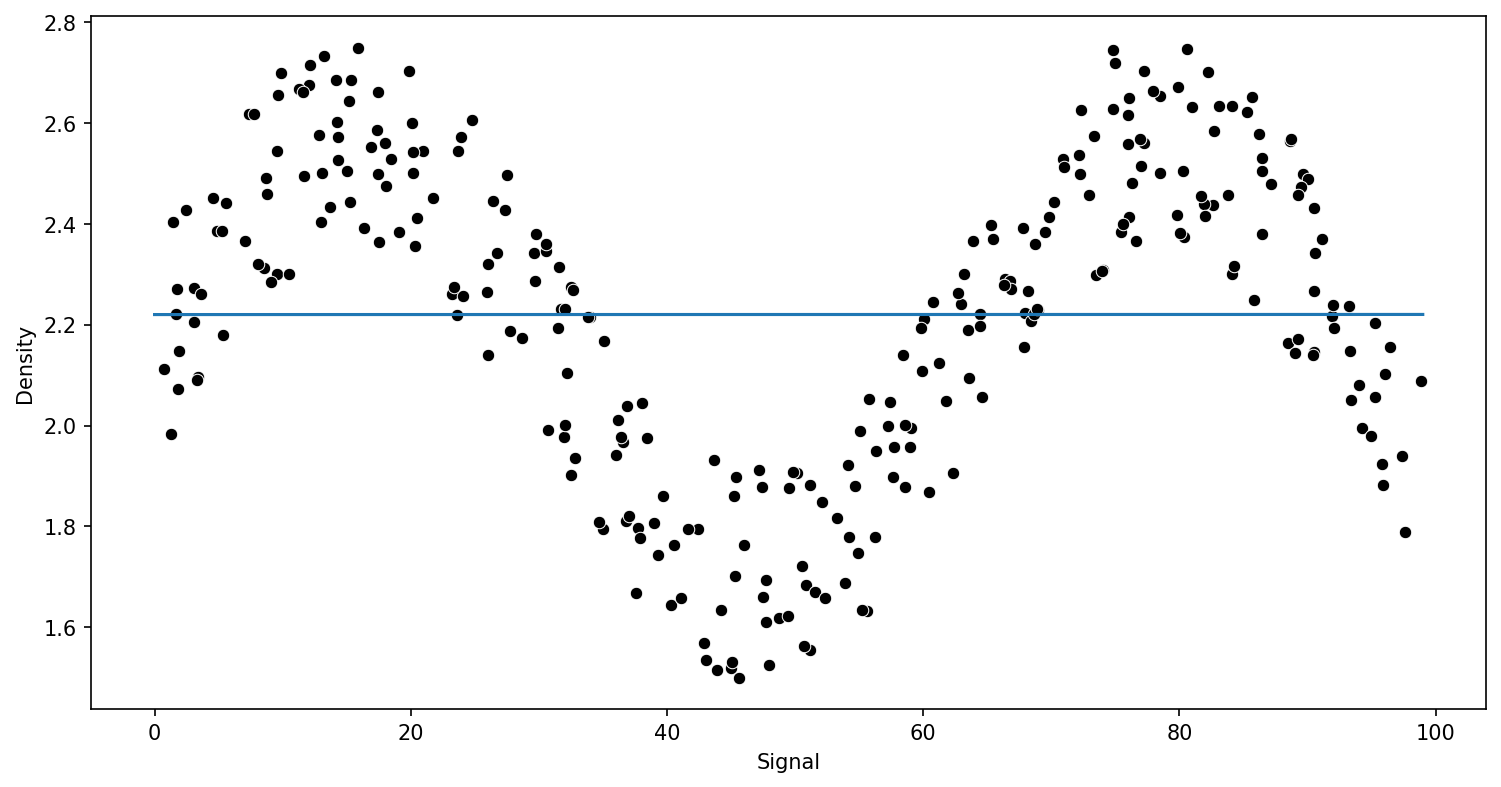

In [20]:
run_model(lr_model,X_train,y_train,X_test,y_test)

-----

## Полиномиальная регрессия

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
polylr_model = LinearRegression()

RMSE : 0.2570051996584629


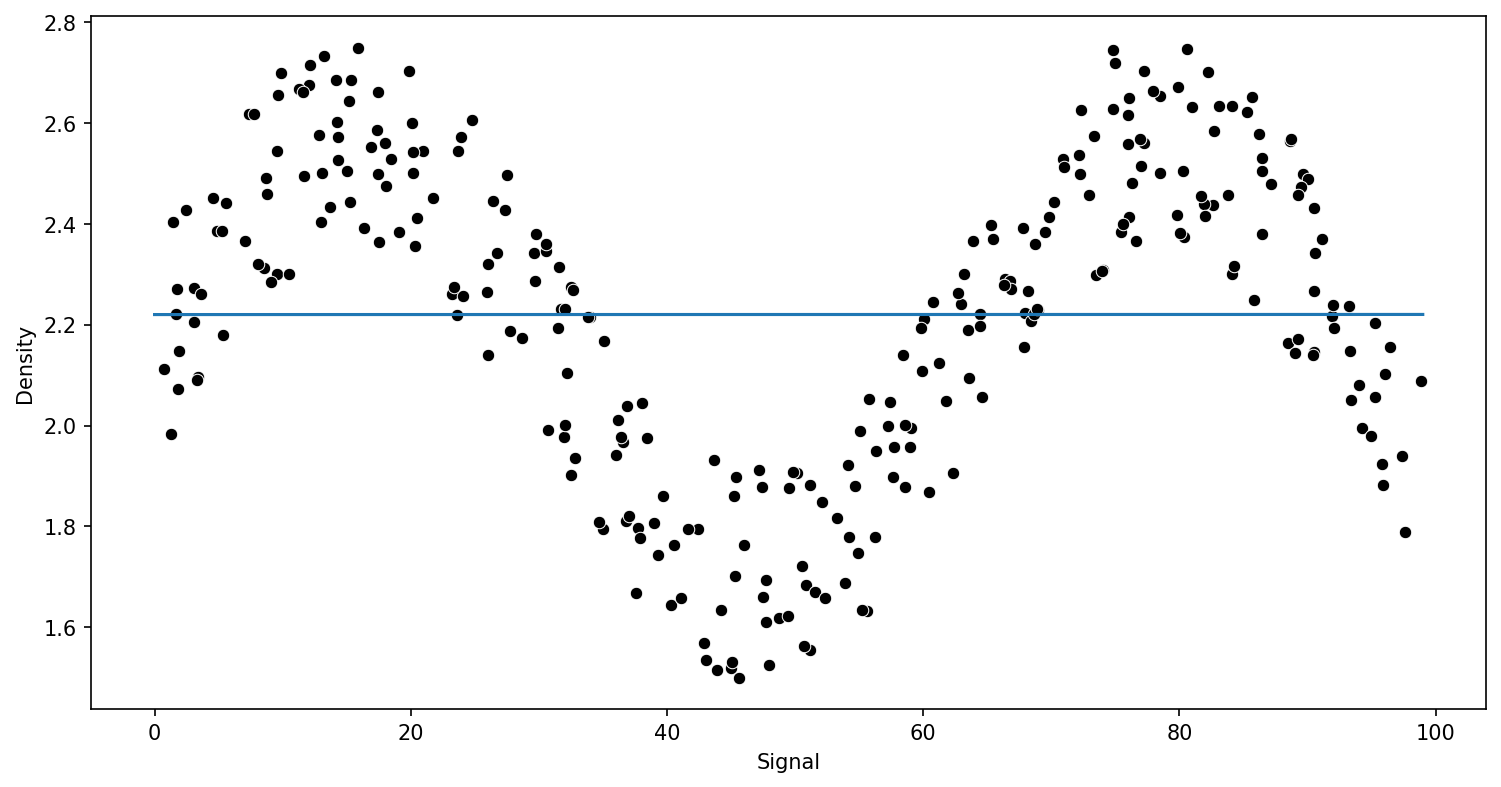

In [23]:
run_model(polylr_model,X_train,y_train,X_test,y_test)

### Пайплайн для степеней полинома

In [24]:
from sklearn.pipeline import make_pipeline

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725547


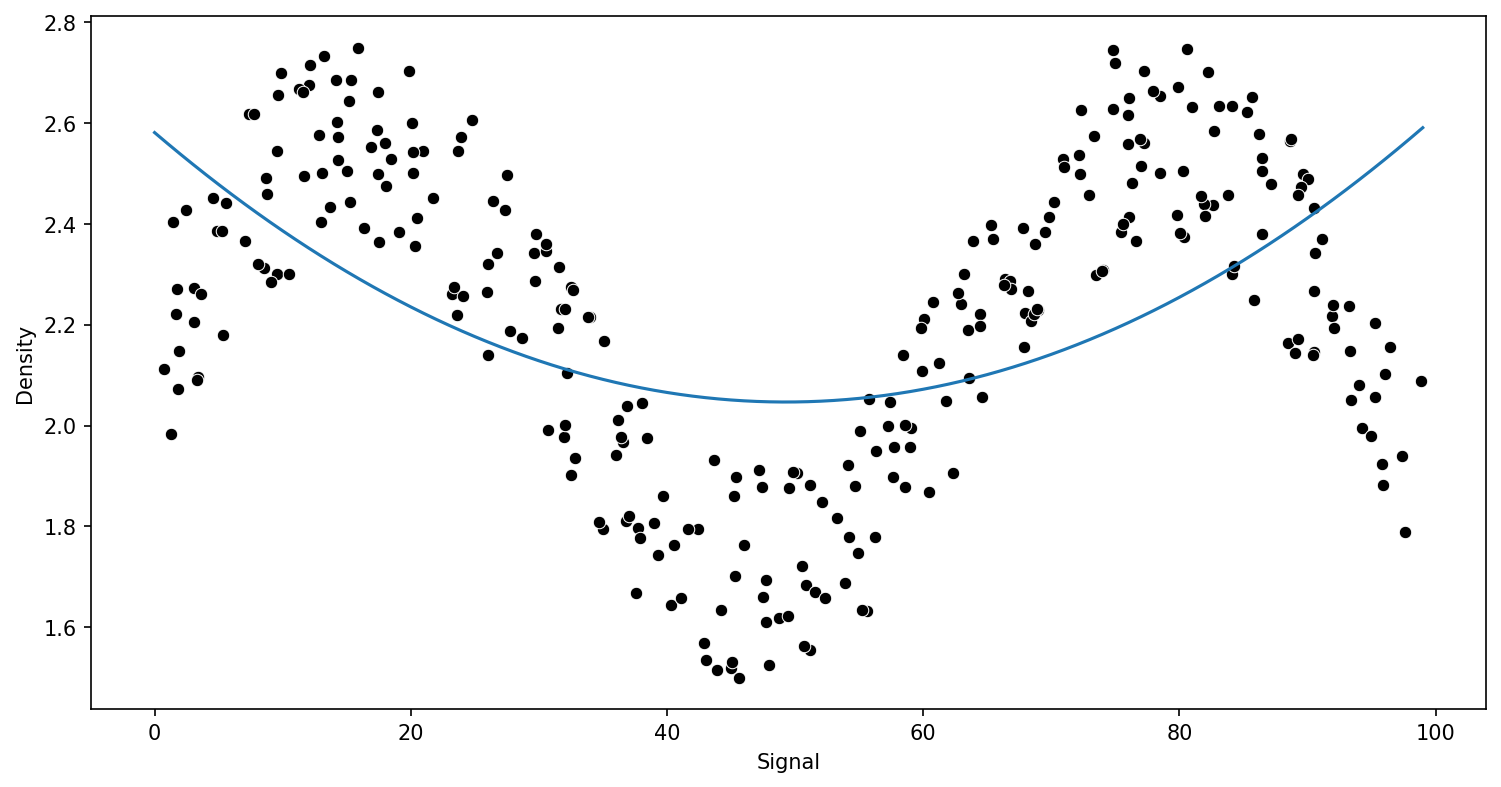

In [27]:
run_model(pipe,X_train,y_train,X_test,y_test)

### Сравнение различных степеней полинома

RMSE : 0.1626900529281319


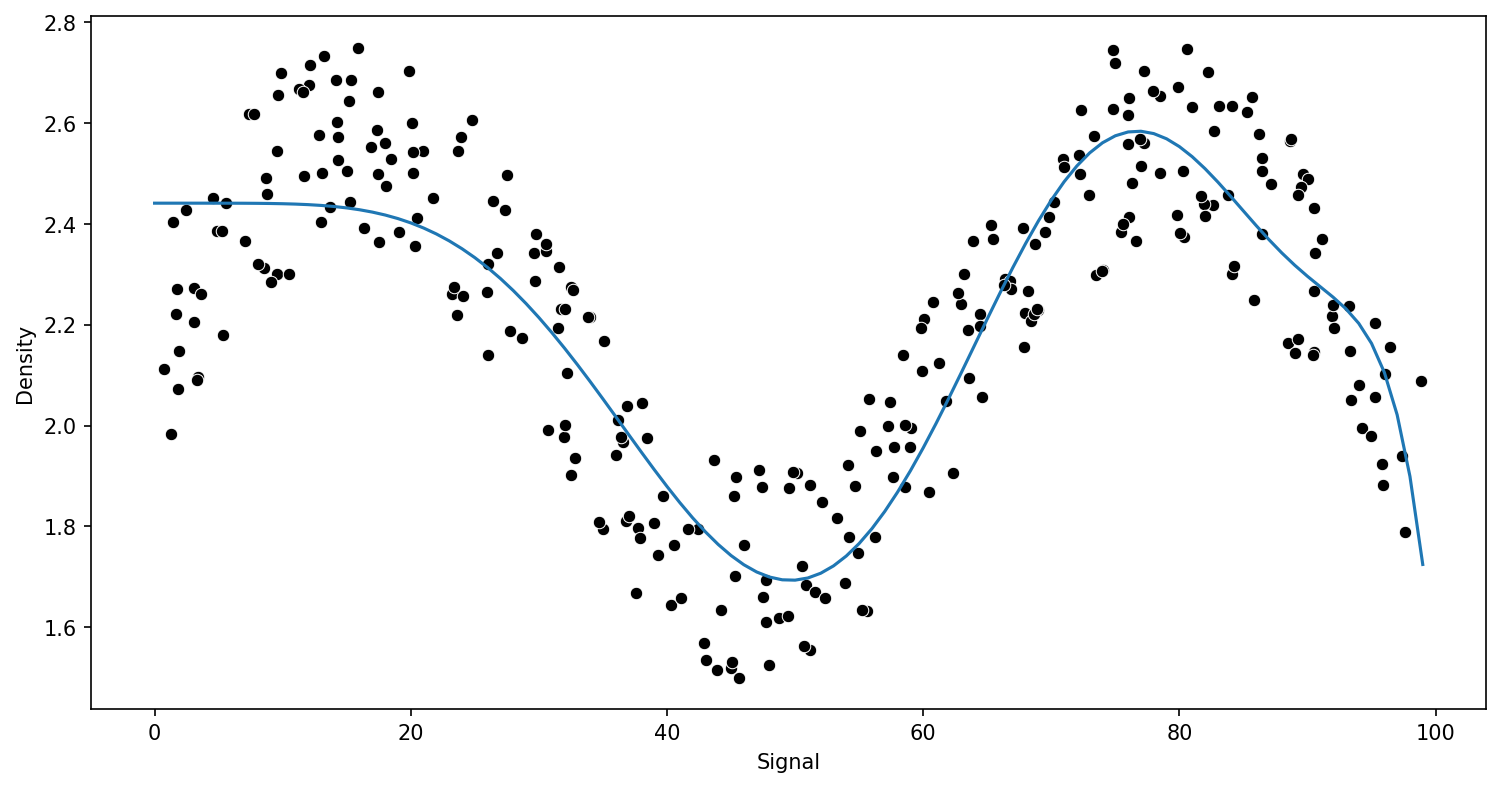

In [28]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

-----

## Регрессия KNN 

In [29]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


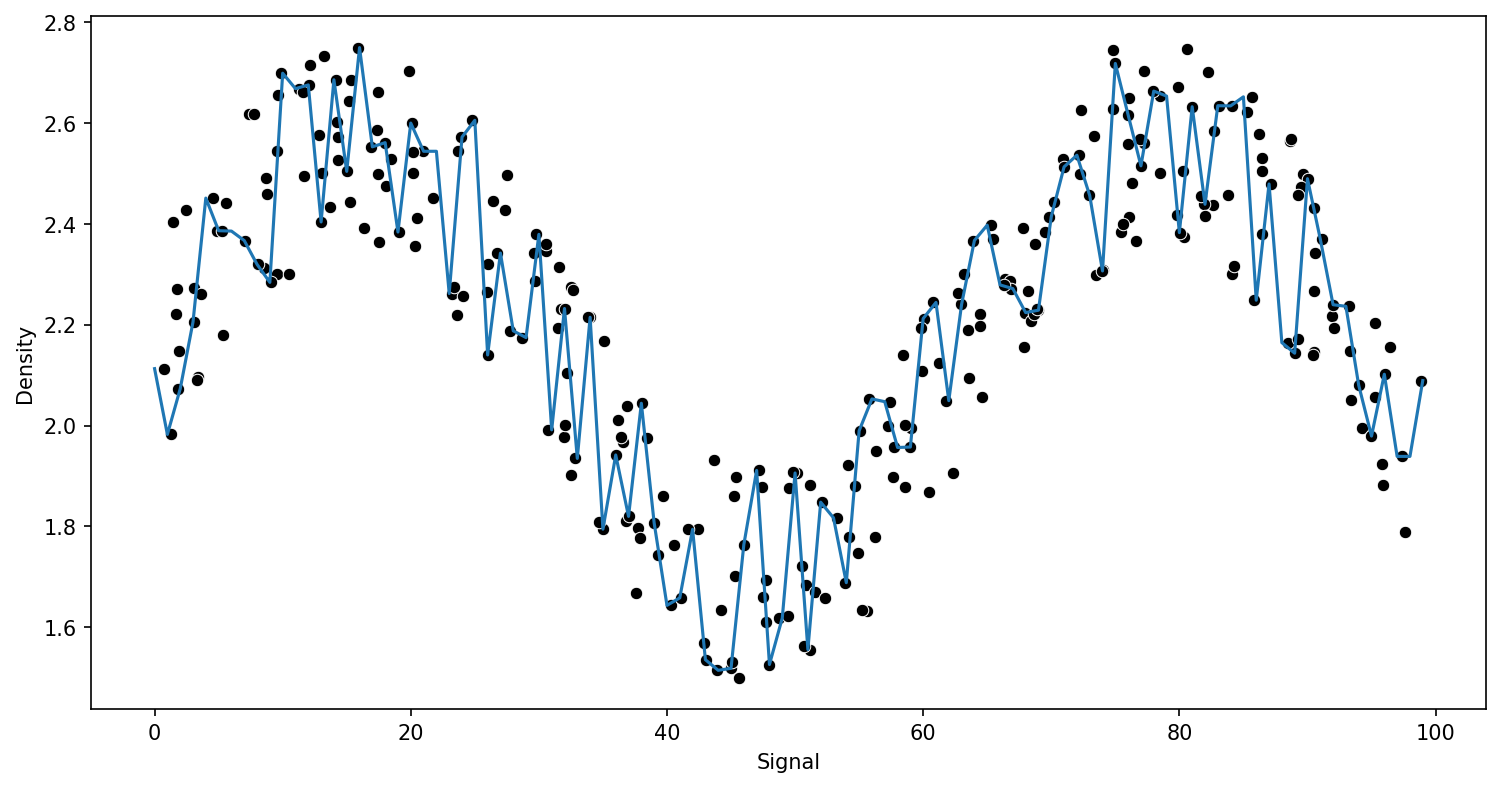

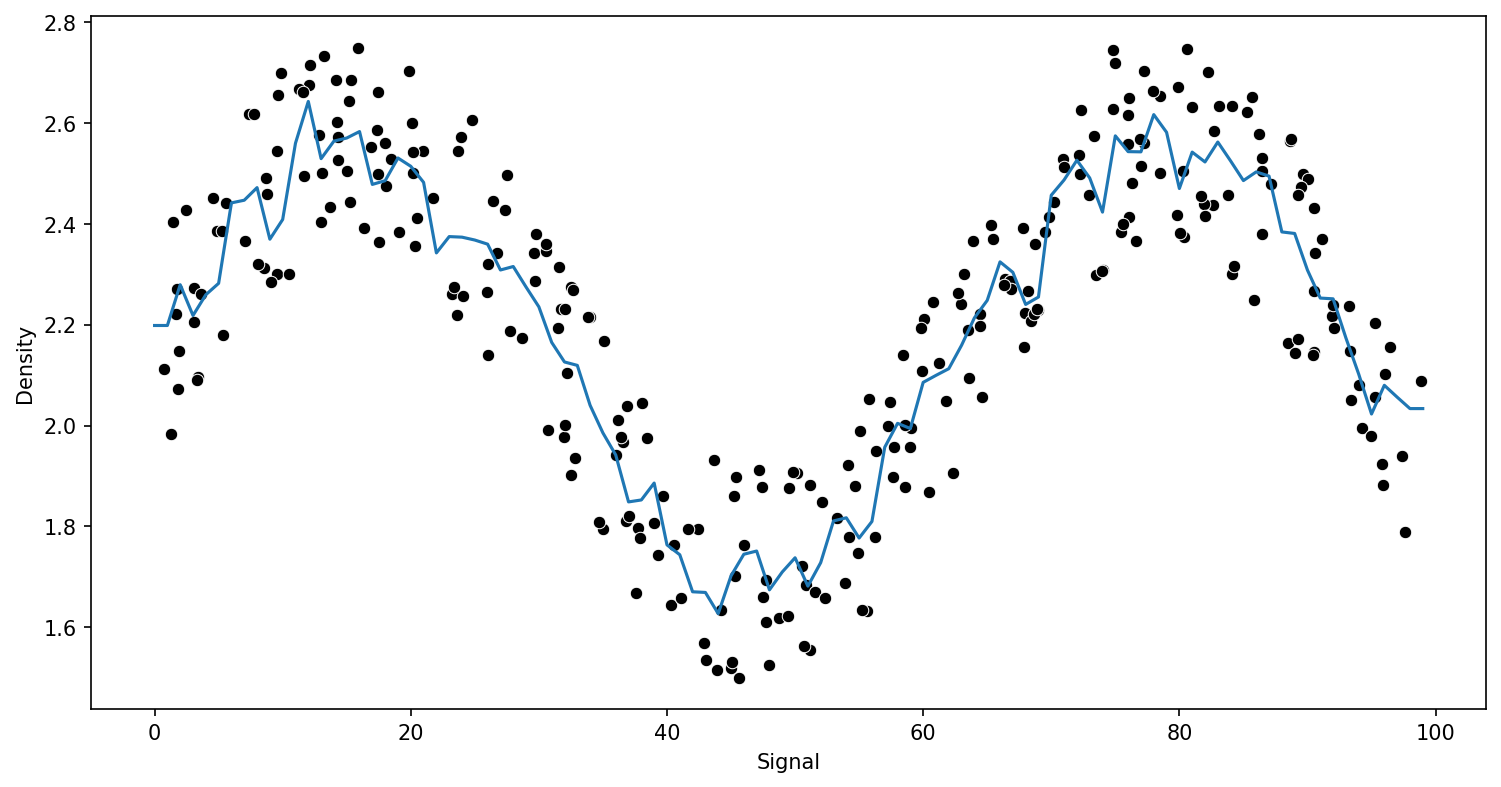

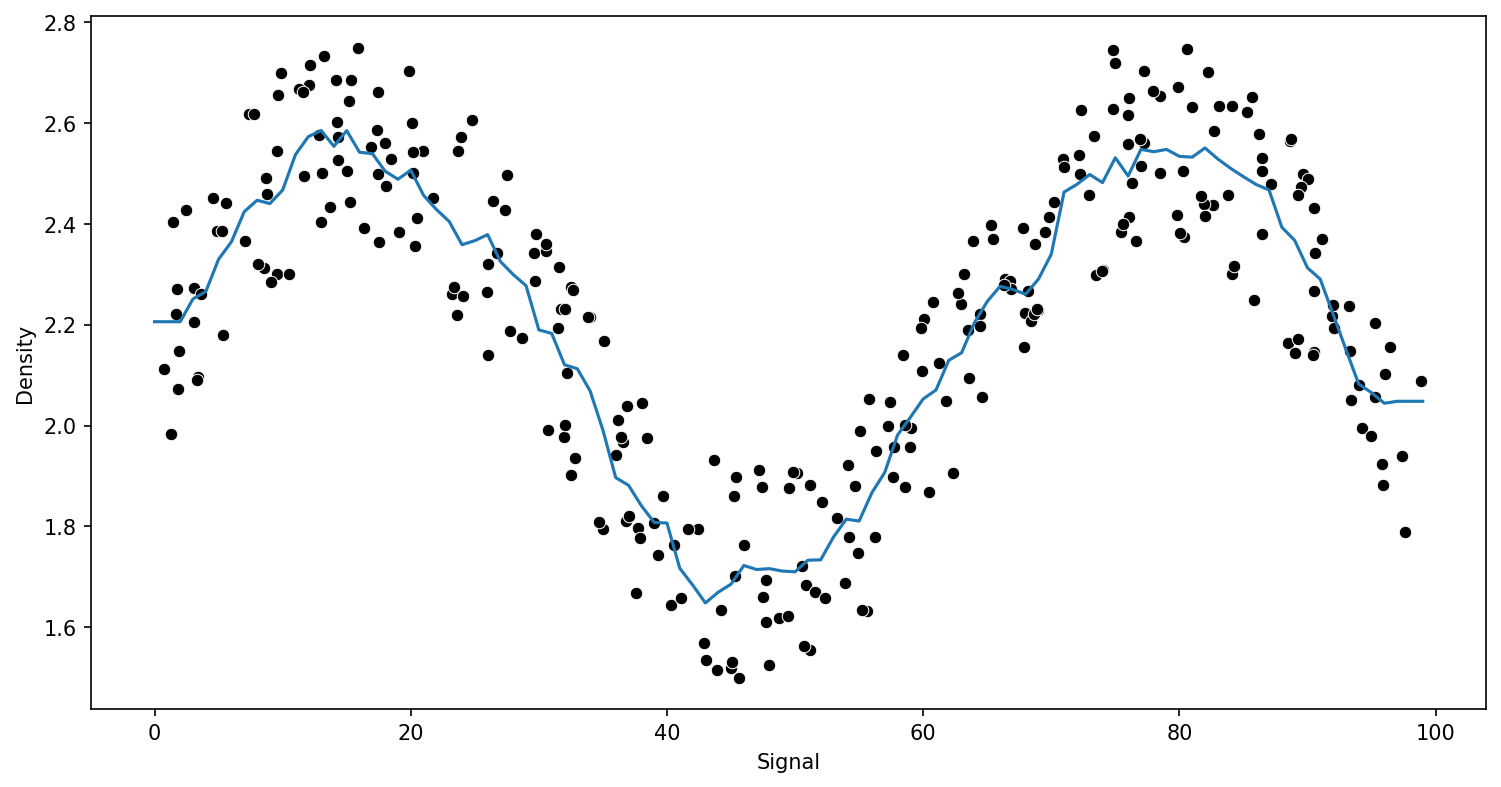

In [30]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=n)
    run_model(knn_model,X_train,y_train,X_test,y_test)

-----

## Деревья решений для регрессии

In [31]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


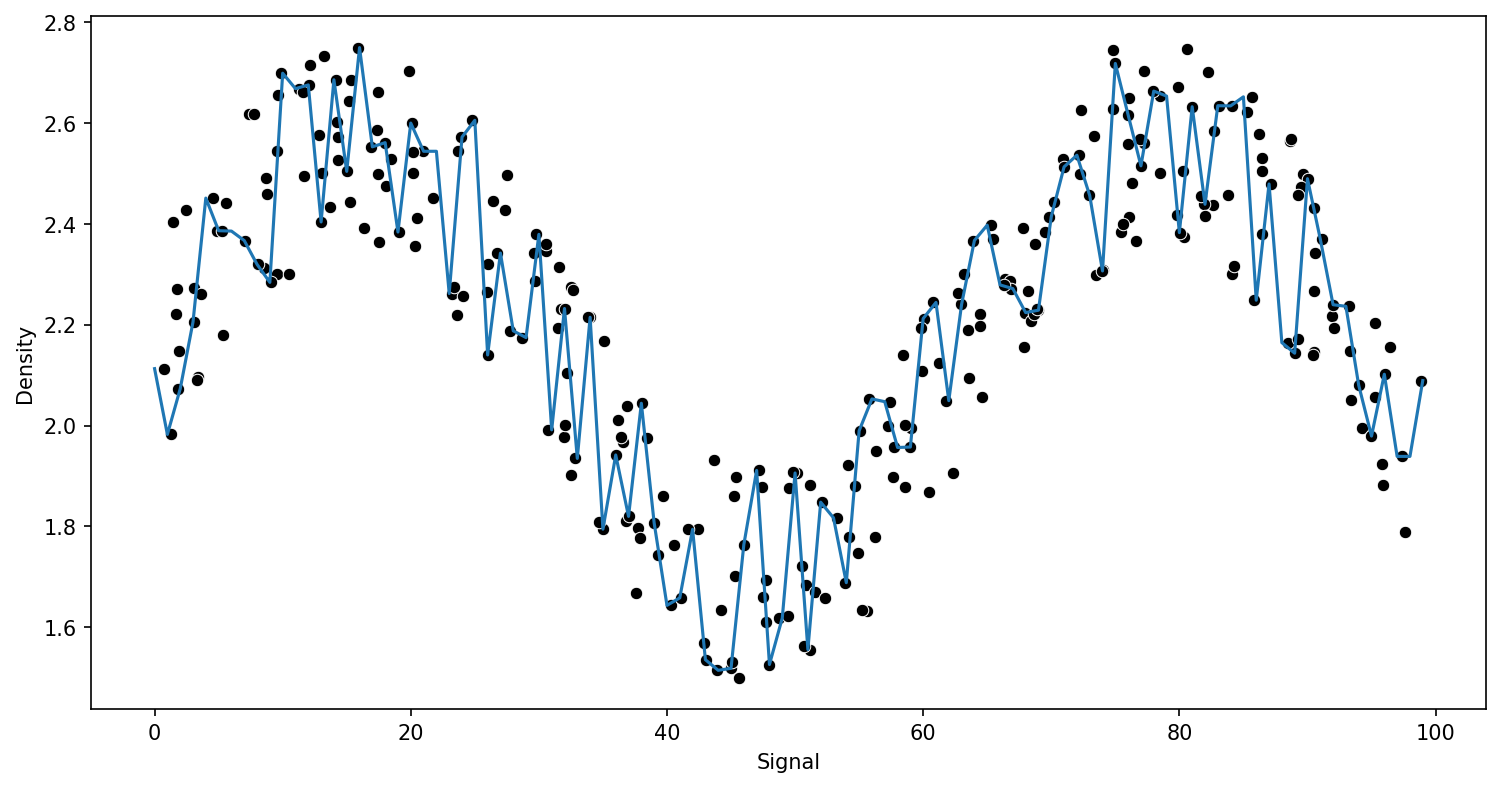

In [32]:
dt_model = DecisionTreeRegressor()

run_model(dt_model,X_train,y_train,X_test,y_test)

In [33]:
dt_model.get_n_leaves()

np.int64(270)

-----

## Метод опорных векторов для регрессии

In [34]:
from sklearn.svm import SVR

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr_model = SVR()

In [37]:
grid = GridSearchCV(svr_model,param_grid)

RMSE : 0.12646999302046696


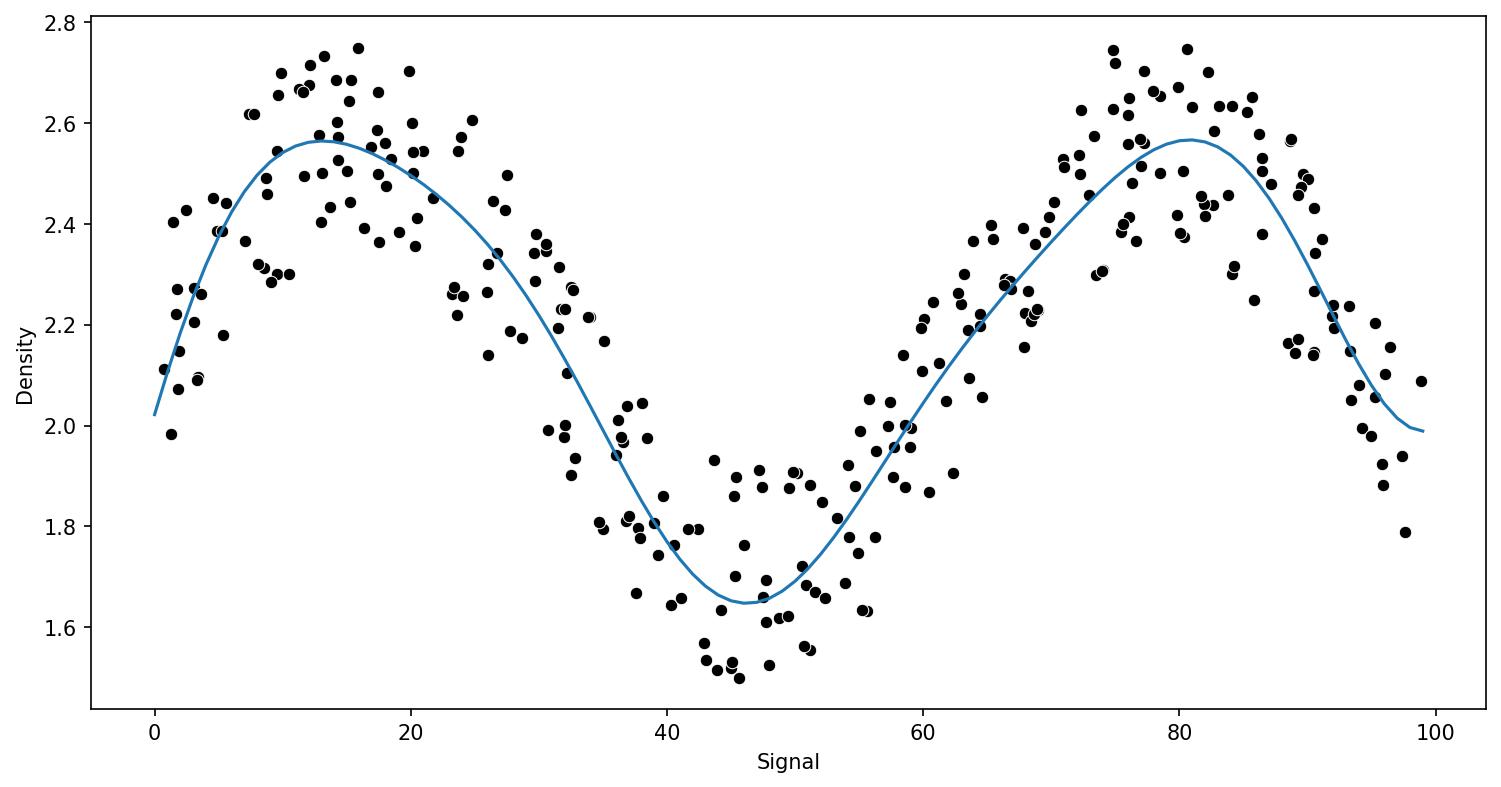

In [38]:
run_model(grid,X_train,y_train,X_test,y_test)

In [39]:
grid.best_estimator_

SVR(C=1000)

-----

## Случайные леса для регрессии

In [40]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.14141495338967364
RMSE : 0.1365801968194465
RMSE : 0.13731665882179048


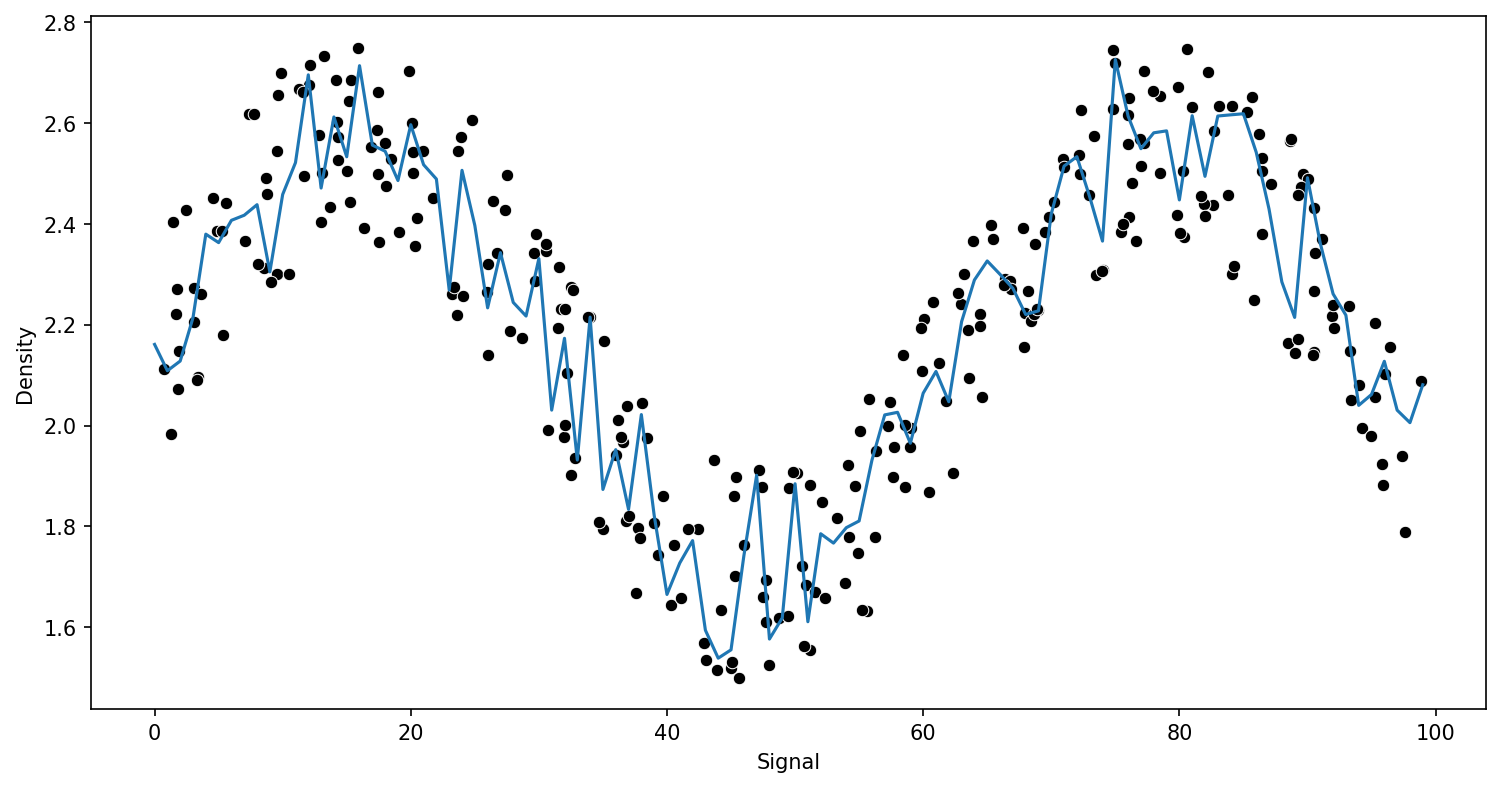

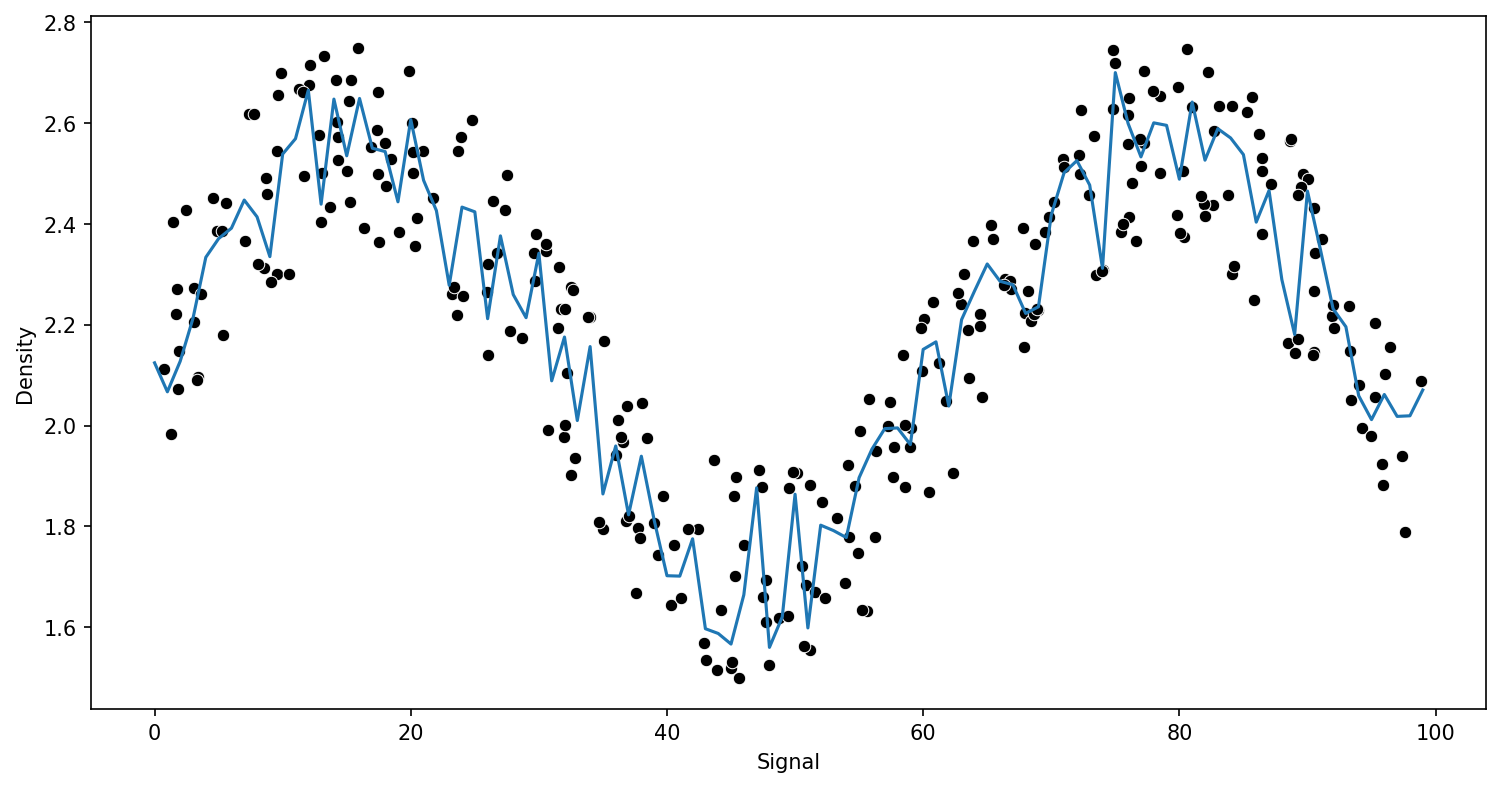

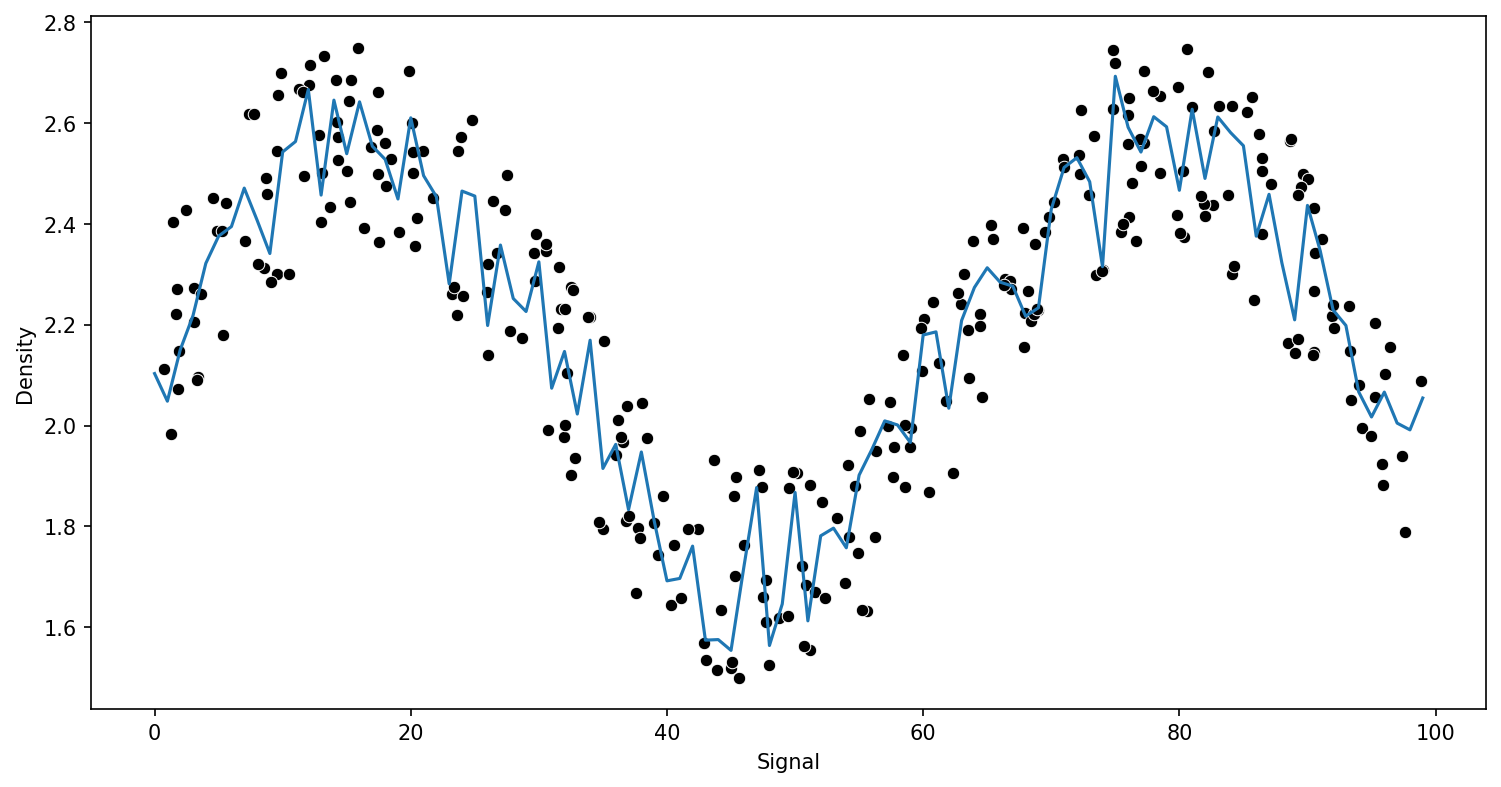

In [41]:
trees = [10,50,100]
for n in trees:
    
    rf_model = RandomForestRegressor(n_estimators=n)
    run_model(rf_model,X_train,y_train,X_test,y_test)

-----

## Градиентный бустинг

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13294148649584667


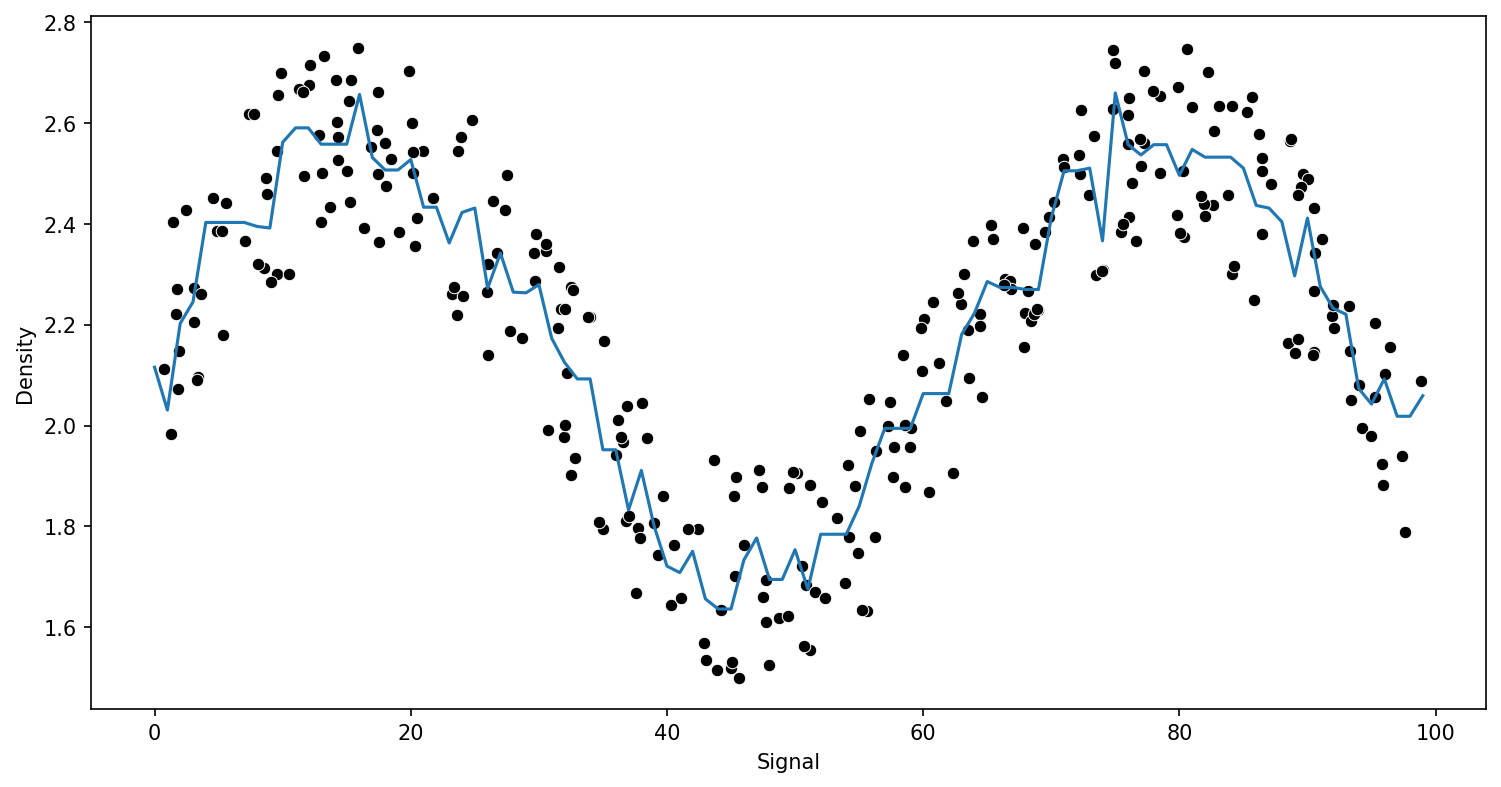

In [43]:
   
gb_model = GradientBoostingRegressor()

run_model(gb_model,X_train,y_train,X_test,y_test)

-----

## Адаптивный бустинг - Adaboost

In [45]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.14212372576483925


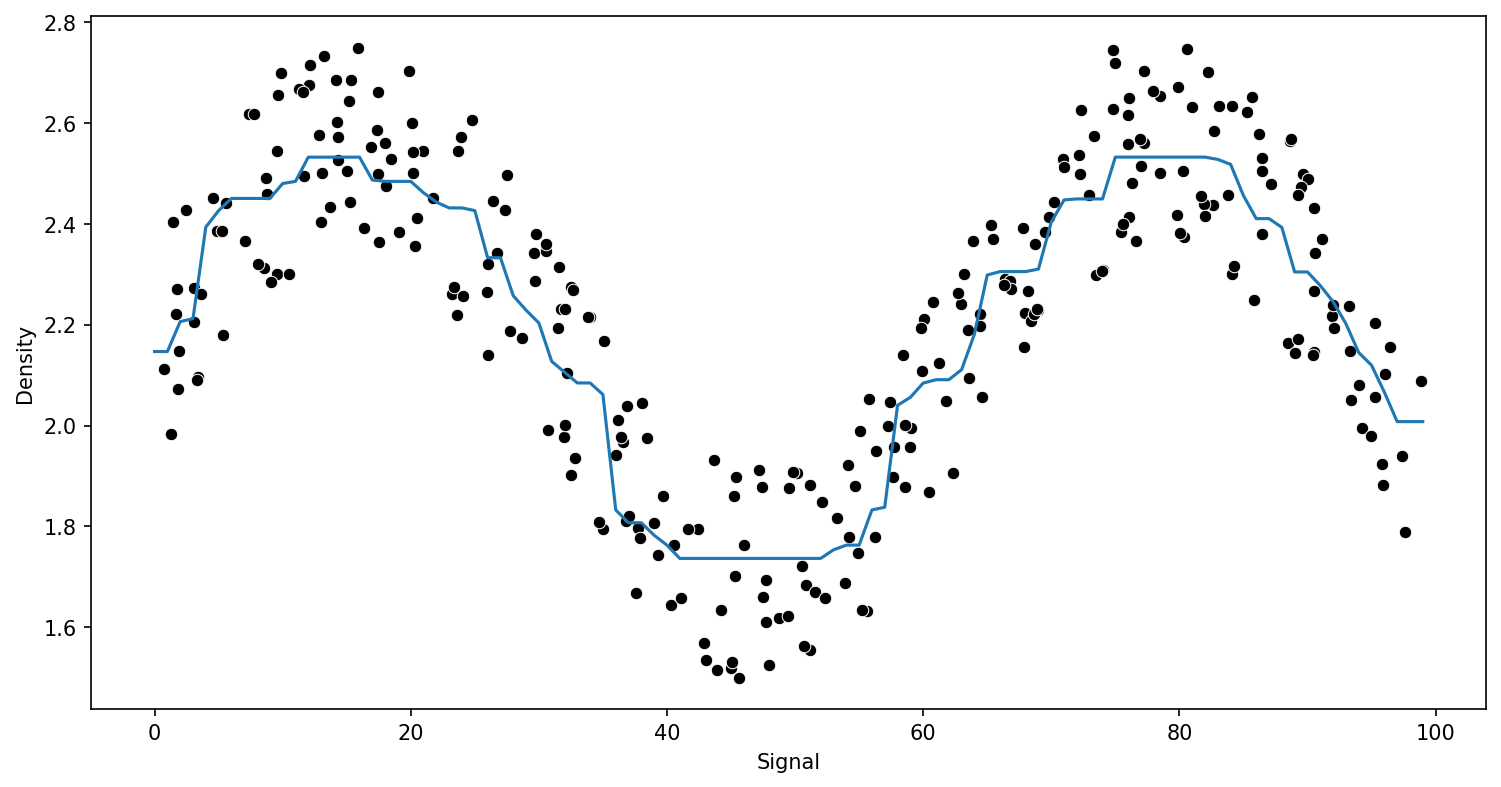

In [46]:
ab_model = AdaBoostRegressor()

run_model(ab_model,X_train,y_train,X_test,y_test)

## Результаты работы:

-   RMSE(Линейная регрессия) = 0.257
-   RMSE(Полиномиальная регрессия степени 10) = 0.163
-   RMSE(Регрессия KNN, количество соседей 10) = 0.133
-   **RMSE(Метод опорных векторов для регрессии) = 0.126**
-   RMSE(Деревья решений для регрессии) = 0.152
-   RMSE(Случайные леса для регрессии) = 0.137
-   RMSE(Градиентный бустинг) = 0.133
-   RMSE(Адаптивный бустинг) = 0.142

## Отличная работа!

---